In [2]:
#A1
import numpy as np

attribute_names = ["Age", "Income", "Student", "Credit_Rating", "Buys_Computer"]

table_data = np.array([
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31-40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31-40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31-40", "medium", "no", "excellent", "yes"],
    ["31-40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
])

def entropy(table_data, column):
    unique_values, counts = np.unique(table_data[:, column], return_counts=True)
    probabilities = counts / len(table_data)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

entropies = {}
for column in range(table_data.shape[1] - 1):
    entropies[attribute_names[column]] = entropy(table_data, column)

root_node = max(entropies.items(), key=lambda item: item[1])[0]

print("Entropy of each feature:")
for attribute, entropy_val in entropies.items():
    print(f"{attribute}: {entropy_val:.3f}")

print("First feature to be selected for constructing the decision tree:")
print(f"{root_node}: {entropies[root_node]:.3f}")


Entropy of each feature:
Age: 1.577
Income: 1.557
Student: 1.000
Credit_Rating: 0.985
First feature to be selected for constructing the decision tree:
Age: 1.577


In [5]:
#A2
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


table_data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(table_data)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

tree_depth = pipeline.named_steps["classifier"].get_depth()

print(f"Tree depth: {tree_depth}")

Tree depth: 4


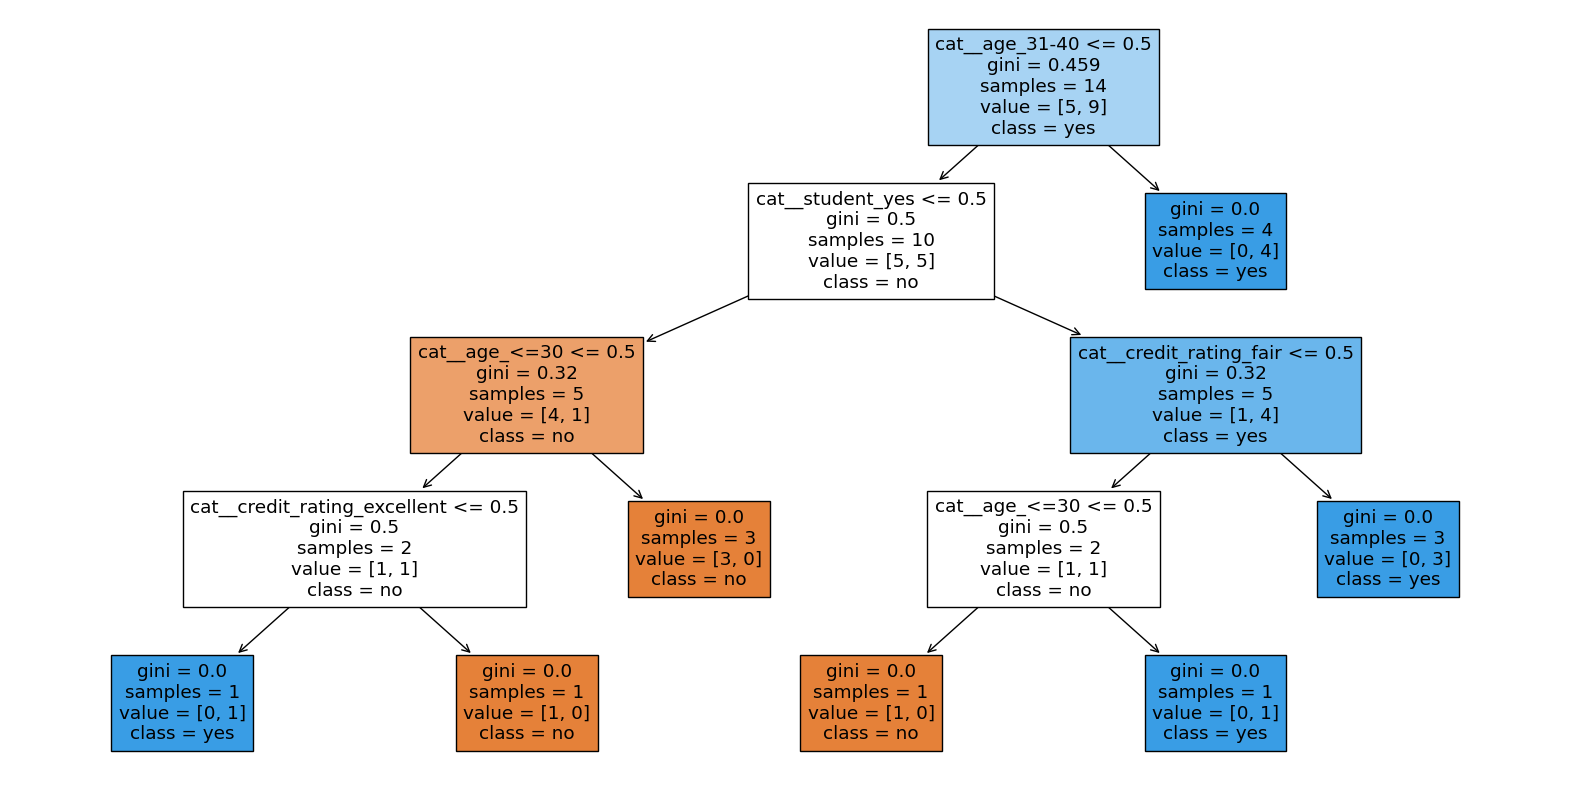

In [9]:
#A3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

table_data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(table_data)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

feature_names = list(pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=categorical_features)) + list(X.columns.drop(categorical_features))

plt.figure(figsize=(20, 10))
plot_tree(pipeline.named_steps["classifier"], filled=True, feature_names=feature_names, class_names=['no', 'yes'])
plt.show()


Training Set Accuracy: 1.0
Test Set Accuracy: 0.5405405405405406


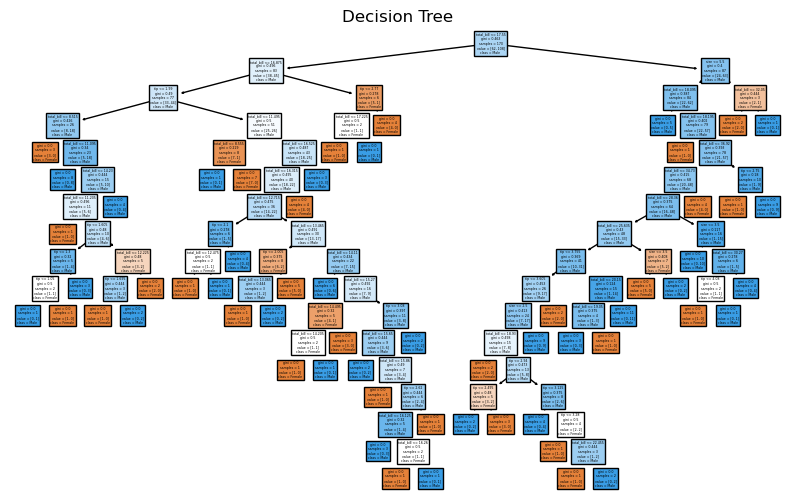

In [13]:
#A4
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

# Load the data from CSV file
try:
    dataframe = pd.read_csv("tips.csv")
except FileNotFoundError:
    print("File not found.")
    exit()
except pd.errors.ParserError:
    print("Error reading the file.")
    exit()

# Split the data into features (X) and target (y)
X = dataframe[['total_bill', 'tip', 'size']]
y = dataframe['sex']

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(train_X, train_y)

# Evaluate the model accuracy
train_accuracy = model.score(train_X, train_y)
test_accuracy = model.score(test_X, test_y)
print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Plot the decision tree
class_names = dataframe['sex'].unique().astype(str).tolist()
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['total_bill', 'tip', 'size'], class_names=class_names)
plt.title("Decision Tree")
plt.show()

Training Set Accuracy (max_depth=5): 0.7470588235294118
Test Set Accuracy (max_depth=5): 0.6621621621621622


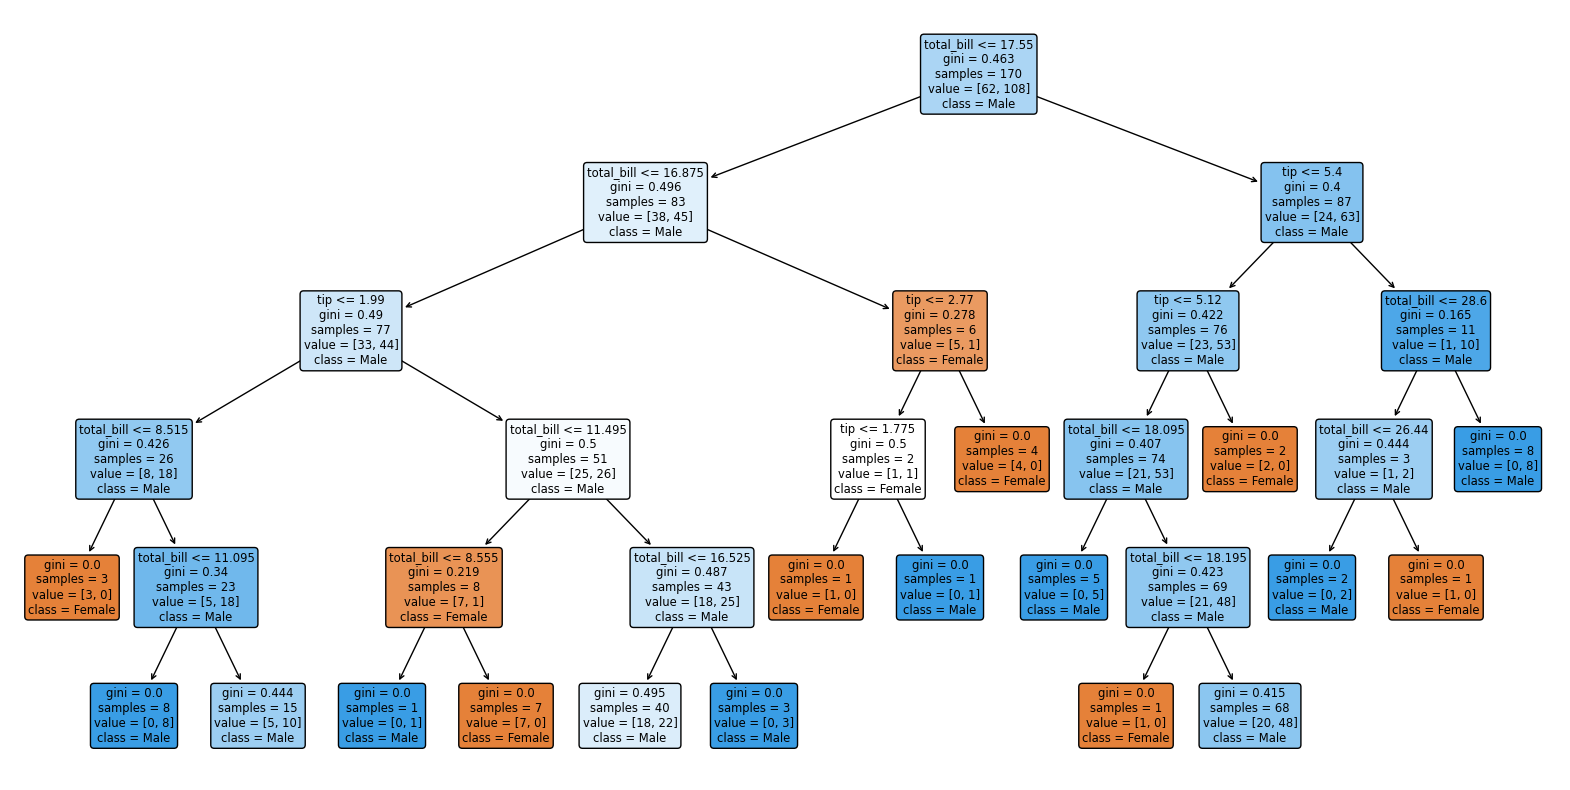

In [20]:
#A5
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

dataframe = pd.read_csv("tips.csv")

model = DecisionTreeClassifier(max_depth=5)

binary_dataframe = dataframe[dataframe['sex'].isin(['Female', 'Male'])]  # Filter based on 'sex' column
X = binary_dataframe[['total_bill', 'tip']]
y = binary_dataframe['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Set Accuracy (max_depth=5): {train_accuracy}")
print(f"Test Set Accuracy (max_depth=5): {test_accuracy}")

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=['total_bill', 'tip'], class_names=['Female', 'Male'], rounded=True)
plt.show()

Training Set Accuracy (criterion='entropy'): 0.9941176470588236
Test Set Accuracy (criterion='entropy'): 0.527027027027027


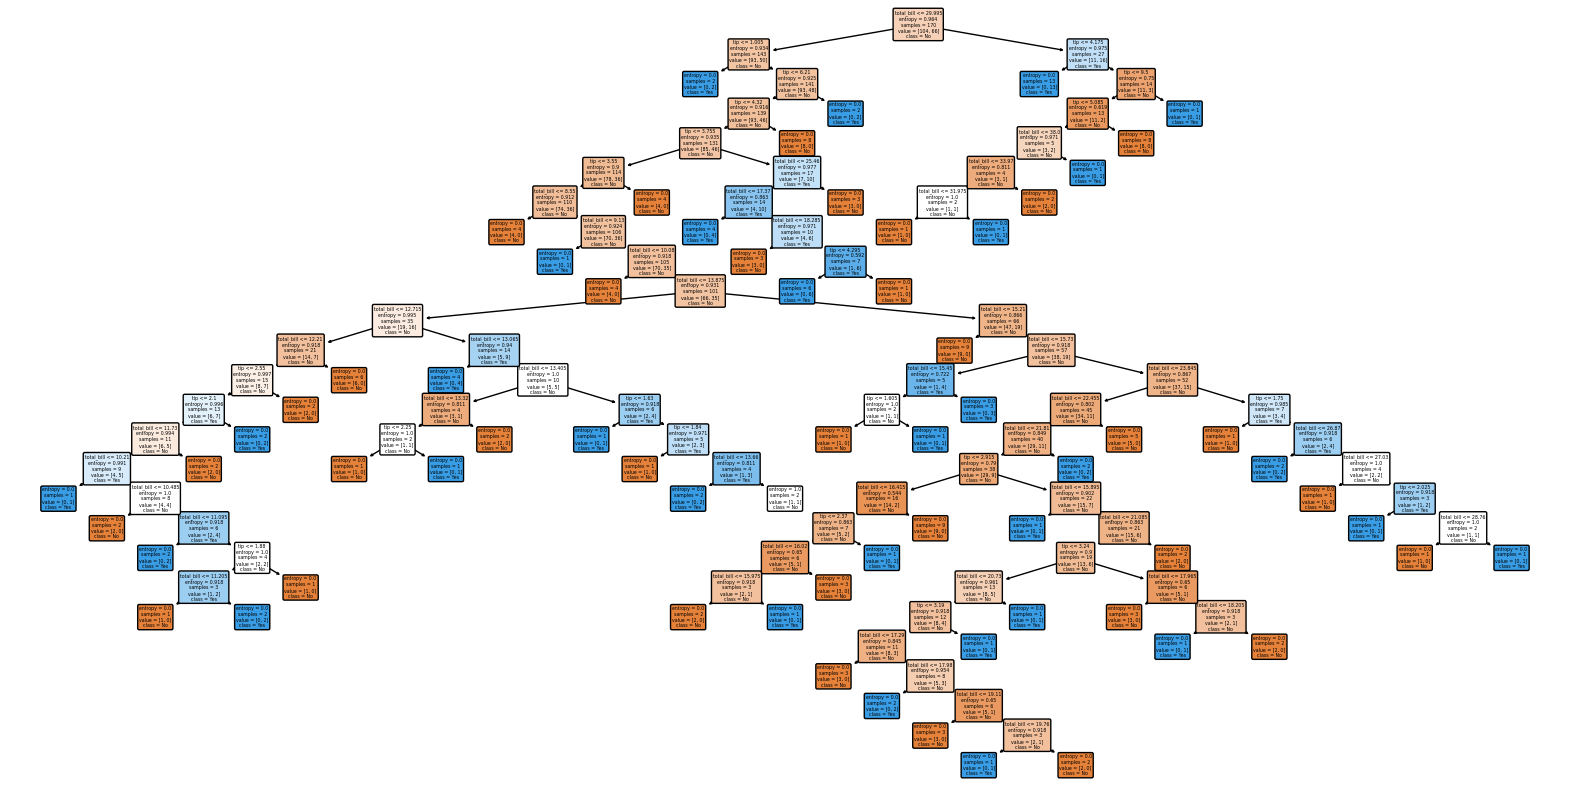

In [25]:
#A6
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

dataframe = pd.read_csv("tips.csv")

model_entropy = DecisionTreeClassifier(criterion="entropy")

binary_dataframe = dataframe[dataframe['smoker'].isin(['No', 'Yes'])]
X = binary_dataframe[['total_bill', 'tip']]
y = binary_dataframe['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_entropy.fit(X_train, y_train)

train_accuracy = model_entropy.score(X_train, y_train)
test_accuracy = model_entropy.score(X_test, y_test)

print(f"Training Set Accuracy (criterion='entropy'): {train_accuracy}")
print(f"Test Set Accuracy (criterion='entropy'): {test_accuracy}")

plt.figure(figsize=(20, 10))
plot_tree(model_entropy, filled=True, feature_names=['total_bill', 'tip'], class_names=['No', 'Yes'], rounded=True)
plt.show()

In [28]:
#A7
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Read the dataset
dataframe = pd.read_csv("tips.csv")

# Select the features and target variable
X = dataframe[['total_bill', 'tip', 'size']]
y = dataframe['sex']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

# Predict and evaluate using the decision tree classifier
y_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_dt)
classification_report_dt = classification_report(y_test, y_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)

# Create and fit the random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate using the random forest classifier
y_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_rf)
classification_report_rf = classification_report(y_test, y_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Decision Tree Accuracy: 0.6621621621621622
Decision Tree Confusion Matrix:
 [[ 4 21]
 [ 4 45]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

      Female       0.50      0.16      0.24        25
        Male       0.68      0.92      0.78        49

    accuracy                           0.66        74
   macro avg       0.59      0.54      0.51        74
weighted avg       0.62      0.66      0.60        74


Random Forest Accuracy: 0.5945945945945946
Random Forest Confusion Matrix:
 [[ 3 22]
 [ 8 41]]
Random Forest Classification Report:
               precision    recall  f1-score   support

      Female       0.27      0.12      0.17        25
        Male       0.65      0.84      0.73        49

    accuracy                           0.59        74
   macro avg       0.46      0.48      0.45        74
weighted avg       0.52      0.59      0.54        74



In [ ]:
#A8
To increase their performance, random forest classifiers have hyperparameters that can be modified. n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, and criteria are important parameters. Gini impurity and entropy are two factors that can be used to assess the quality of a split in a tree.

Model attributes such as feature_importances_, n_features_, n_classes_, and classes_ can be utilised to examine the behaviour of the model. In general, increasing the number of trees in the forest enhances performance while increasing the computational cost of training and predicting. Identifying the model's most significant features might increase performance by deleting less important ones or collecting more data for them.

Understanding the significance of these factors and features is critical for efficiently tweaking the model. Starting with is an additional tuning tip